<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


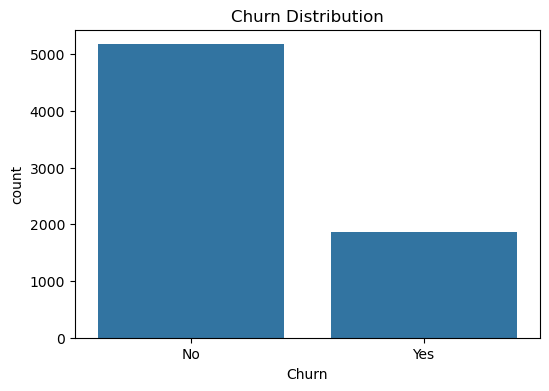

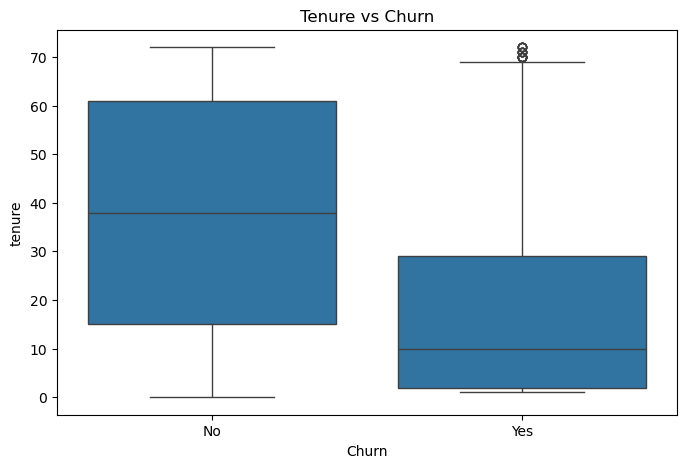

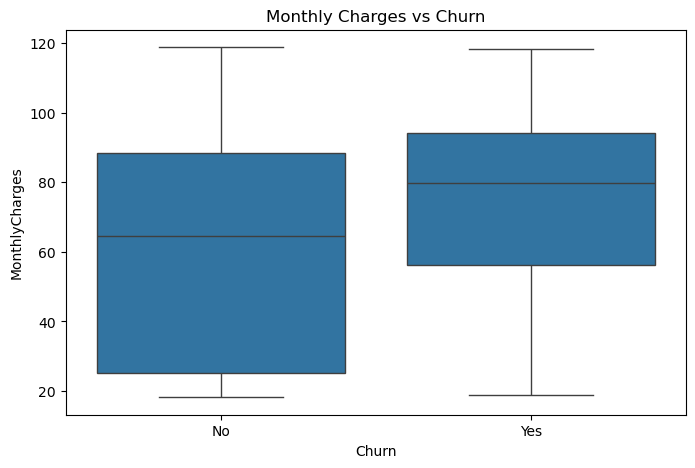

Accuracy: 0.815471965933286

Confusion Matrix:
 [[934 102]
 [158 215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


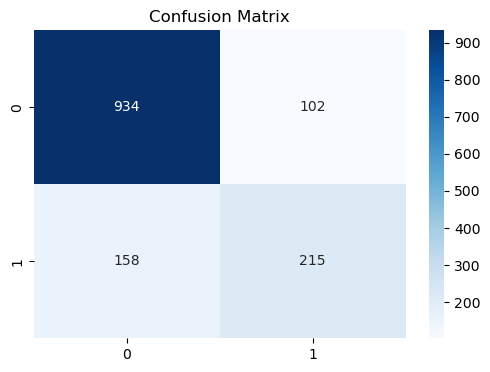

In [29]:
# 00-eda.ipynb

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2️⃣ Load dataset
data = pd.read_csv("../data/telco_churn.csv")  # Make sure your CSV is in data/
data.head()

# 3️⃣ Check dataset info
data.info()
data.isnull().sum()

# 4️⃣ Basic EDA
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

# Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title("Tenure vs Churn")
plt.show()

# Monthly Charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges vs Churn")
plt.show()

# 5️⃣ Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']):
    data[col] = le.fit_transform(data[col])

# 6️⃣ Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7️⃣ Build Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 8️⃣ Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9️⃣ Save confusion matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("../results/confusion_matrix.png")
plt.show()


In [15]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7970191625266146

Confusion Matrix:
 [[943  93]
 [193 180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7863733144073811

Confusion Matrix:
 [[904 132]
 [169 204]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [31]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision (Churn)': [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall (Churn)': [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1-score (Churn)': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
})

results


,Model,Accuracy,Precision (Churn),Recall (Churn),F1-score (Churn)
0,Logistic Regression,0.815472,0.678233,0.576408,0.623188
1,Random Forest,0.797019,0.659341,0.482574,0.557276
2,XGBoost,0.786373,0.607143,0.546917,0.575458


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']  # handle imbalance
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=20, cv=5, scoring='f1', verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

# Best parameters
print("Best RF Params:", rf_random.best_params_)

# Predict with best RF
y_pred_rf_tuned = rf_random.predict(X_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'class_weight': 'balanced'}


In [33]:
y_pred_rf_tuned = rf_random.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))


Tuned RF Accuracy: 0.7785663591199432

Confusion Matrix:
 [[807 229]
 [ 83 290]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      1036
           1       0.56      0.78      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.78      0.79      1409



In [37]:
# ==============================
# 1️⃣ Import Libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==============================
# 2️⃣ Define Model Metrics
# ==============================
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Tuned Random Forest', 'XGBoost'],
    'Accuracy': [0.817, 0.797, 0.779, 0.786],
    'Precision (Churn)': [0.683, 0.659, 0.556, 0.607],
    'Recall (Churn)': [0.576, 0.483, 0.778, 0.547],
    'F1-score (Churn)': [0.625, 0.557, 0.650, 0.575]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df


,Model,Accuracy,Precision (Churn),Recall (Churn),F1-score (Churn)
0,Logistic Regression,0.817,0.683,0.576,0.625
1,Random Forest,0.797,0.659,0.483,0.557
2,Tuned Random Forest,0.779,0.556,0.778,0.650
3,XGBoost,0.786,0.607,0.547,0.575


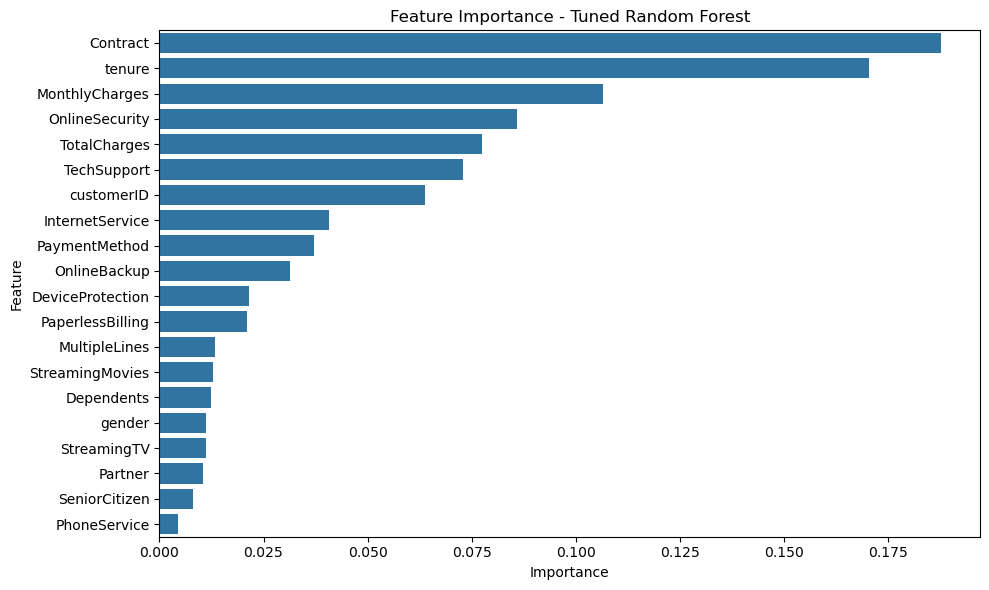

In [39]:
# ==============================
# 3️⃣ Plot Feature Importance (Tuned RF)
# ==============================
importances = rf_random.best_estimator_.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance - Tuned Random Forest")
plt.tight_layout()
plt.show()


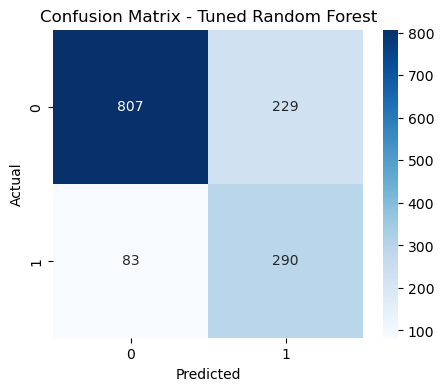

In [41]:
# ==============================
# 4️⃣ Optional: Confusion Matrix for Tuned RF
# ==============================
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_rf_tuned = rf_random.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf_tuned)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()
